initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-23 00:00:00 -> 2017-01-27 23:55:00 length: 1440
plotting...


c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn

--- running time: 2.309441089630127---


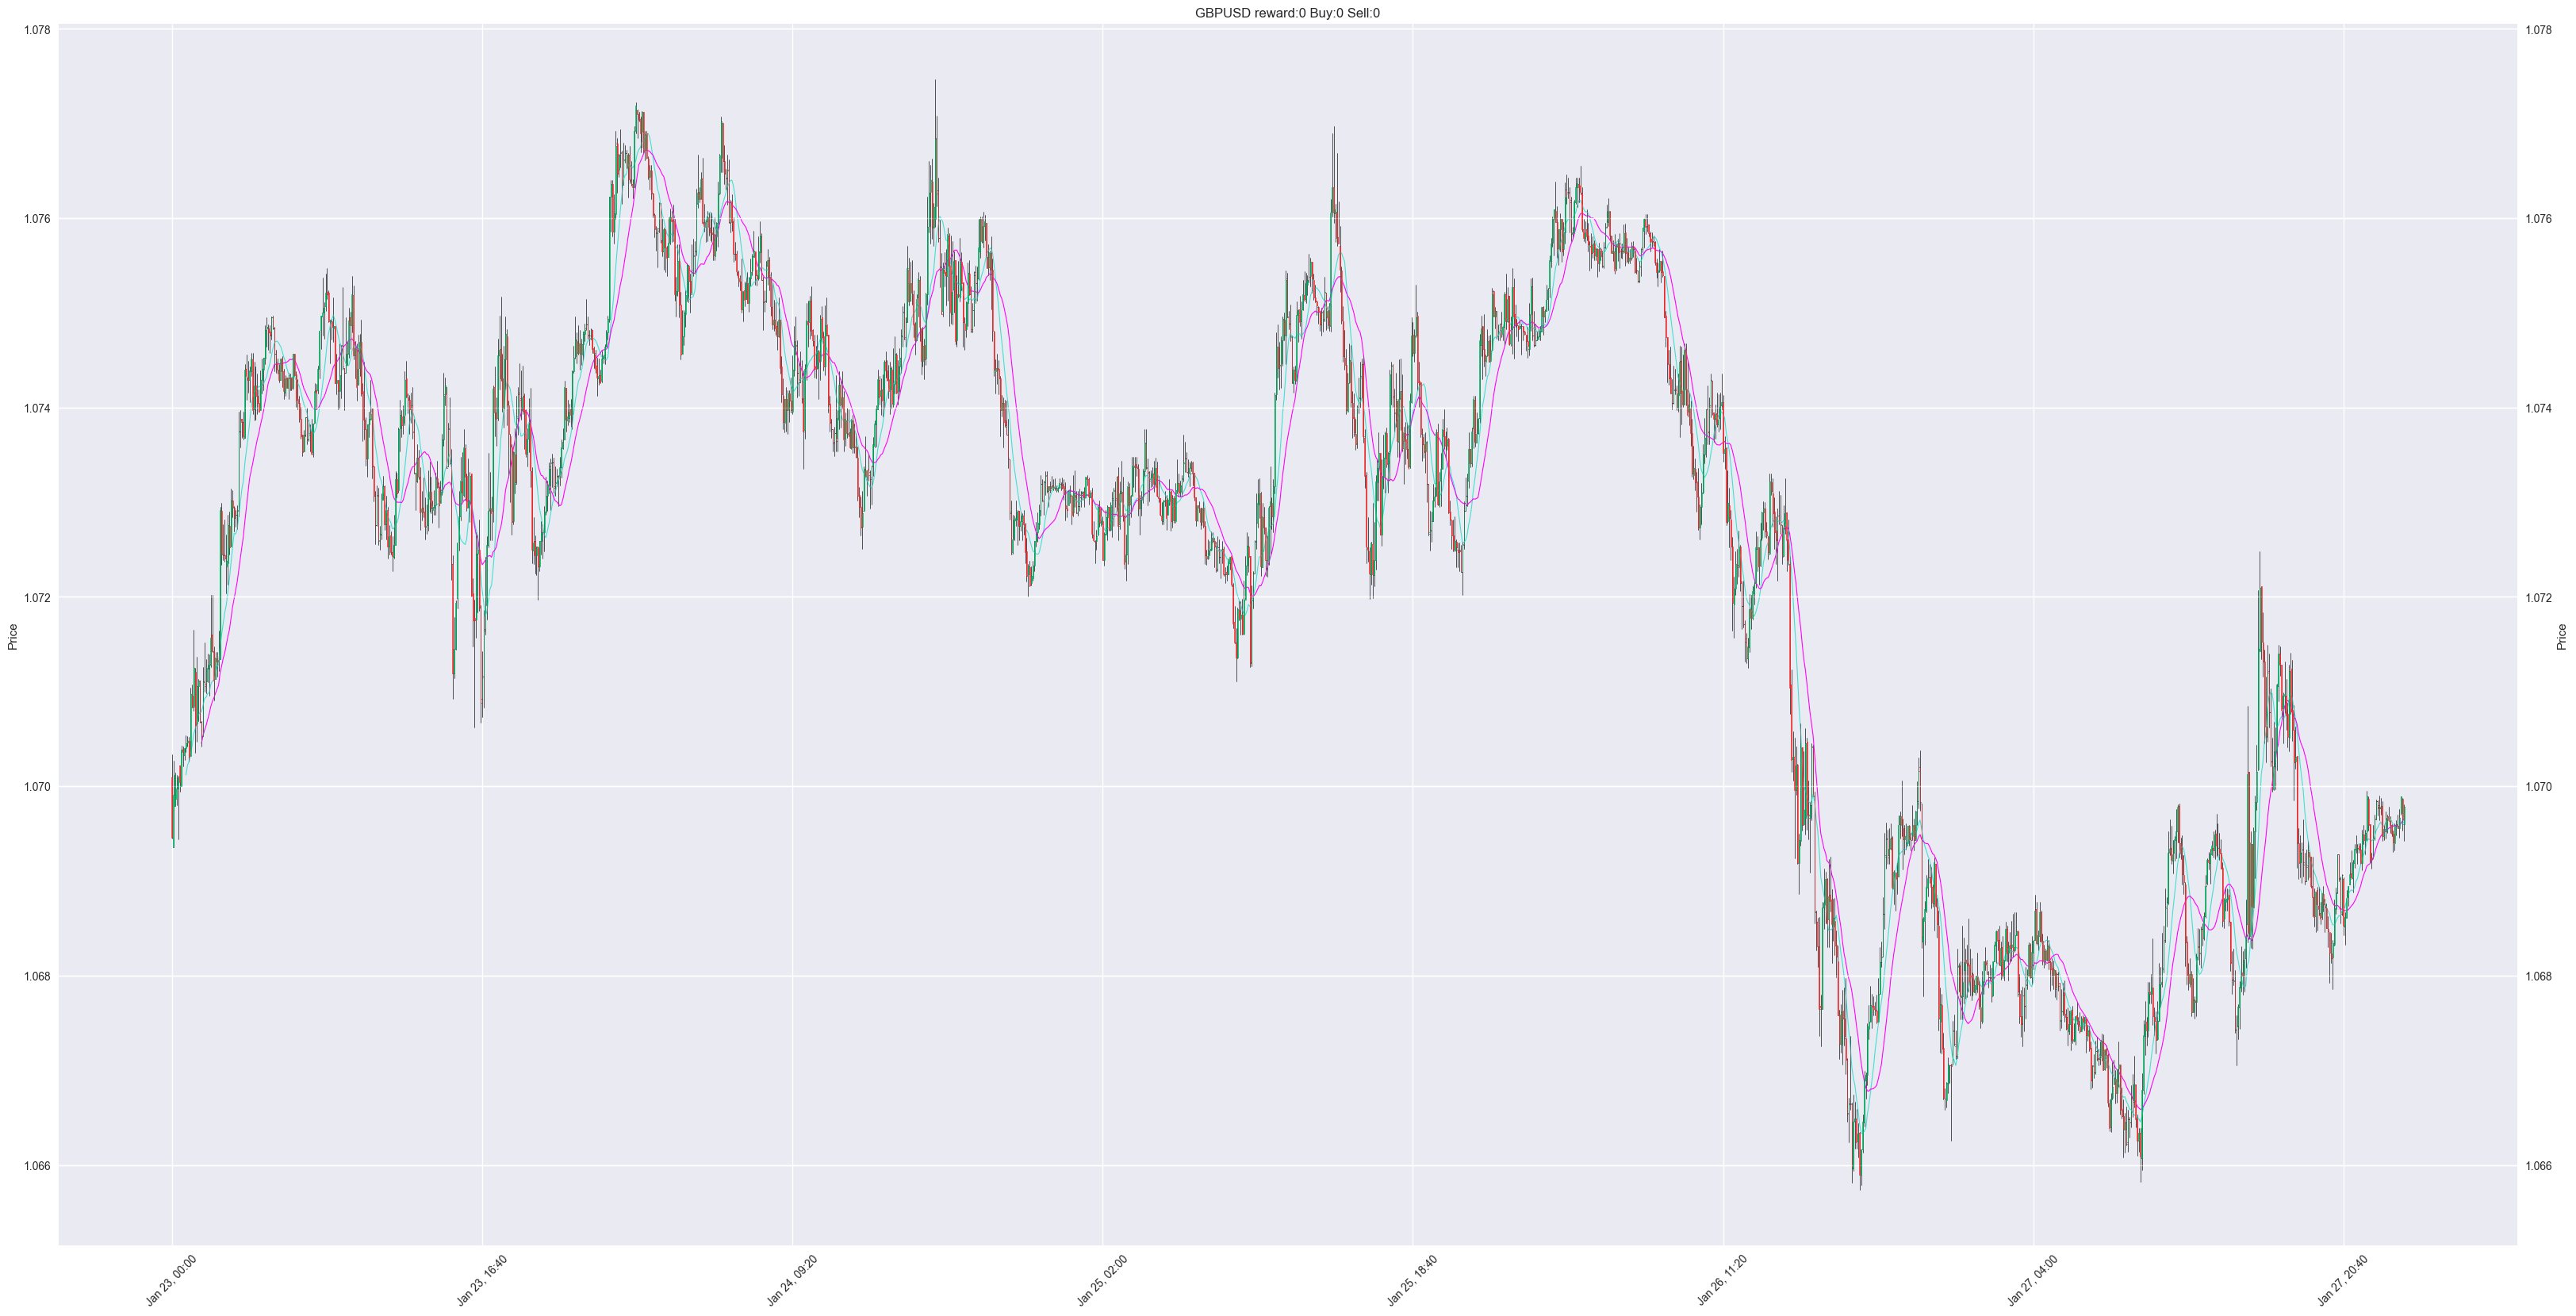

In [9]:
import pandas as pd
from neo_finrl.env_fx_trading.env_fx import tgym
import time
import datetime
import gym
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import TD3
from stable_baselines3.common.env_util import make_vec_env
from neo_finrl.env_fx_trading.util.action_enum import ActionEnum, form_action
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_3.csv"
df = pd.read_csv(file)
env_name ="TradingGym-v0"
# t = gym.make(env_name)
t = tgym(df)
# if model: del model # remove to demonstrate saving and loading
model_name='./data/models/GBPUSD-week-20220204105924'
model_name='ppo_fx-2017-5'
if model_name.startswith('ppo'):
    model = PPO.load(model_name)
elif model_name.startswith('sac'):
    model = SAC.load(model_name)
elif model_name.startswith('td3'):
    model = TD3.load(model_name)
else:
    model = PPO.load(model_name)

start_time = time.time()
obs = t.reset()
t.current_step=0
done = False
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = t.step(action)
    # print(form_action(action[0]))
t.render(mode='graph')
print(f"--- running time: {(time.time() - start_time)}---")

In [ ]:
import pandas as pd
from neo_finrl.env_fx_trading.env_fx import tgym
import time
import datetime
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_2.csv"
df = pd.read_csv(file)
env_name ="TradingGym-v1"
env = gym.make(env_name)

In [ ]:
from neo_finrl.env_fx_trading.util.action_enum import ActionEnum, form_action
from stable_baselines3 import PPO
model = PPO.load("test")
obs = env.reset()
done=False
step = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    step +=1
    a, r = form_action(action[0])
    print(step, action, a, r , rewards)
env.render(mode='graph')